In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
# drive_path = '/data/allen-brain-observatory/visual-coding-2p'
# manifest_file = os.path.join(drive_path,'manifest.json')

#temp
manifest_file=r'/Users/saskiad/brain_observatory/manifest.json'
boc = BrainObservatoryCache(manifest_file=manifest_file)

/Users/saskiad/anaconda2/lib/python2.7/site-packages/cryptography/hazmat/primitives/constant_time.py:26: CryptographyDeprecationWarning: Support for your Python version is deprecated. The next version of cryptography will remove support. Please upgrade to a 2.7.x release that supports hmac.compare_digest as soon as possible.
  utils.PersistentlyDeprecated2018,


In [3]:
cell_id = 541513979

In [4]:
exps = boc.get_ophys_experiments(cell_specimen_ids=[cell_id], stimuli=['drifting_gratings'])
session_id = exps[0]['id']
data_set = boc.get_ophys_experiment_data(session_id)

2019-06-27 20:18:28,957 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/541045923


In [5]:
timestamps, dff = data_set.get_dff_traces(cell_specimen_ids=[cell_id])
dff_trace = dff[0,:]

Text(0,0.5,u'DFF')

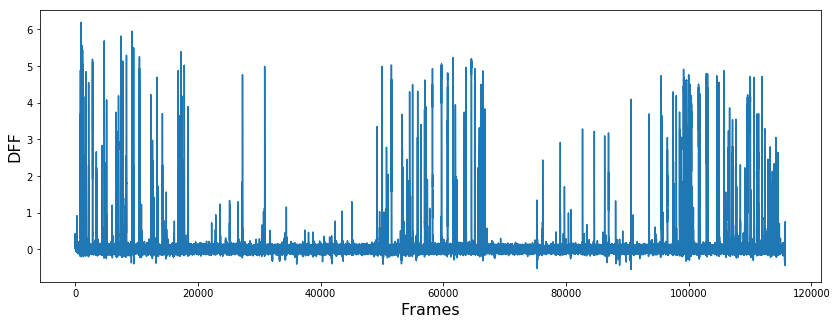

In [6]:
plt.figure(figsize=(14,5))
plt.plot(dff_trace)
plt.xlabel("Frames", fontsize=16)
plt.ylabel("DFF", fontsize=16)

In [7]:
dxcm, ts = data_set.get_running_speed()

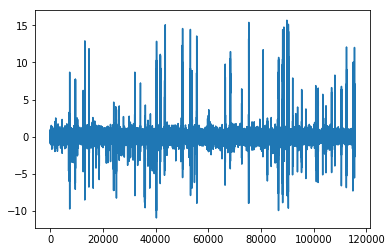

In [8]:
plt.plot(dxcm)

In [12]:
print session_id

540684467


In [13]:
data_set.get_stimulus_epoch_table()

,stimulus,start,end
0,drifting_gratings,736,18810
1,natural_movie_three,19746,37850
2,natural_movie_one,38756,47807
3,drifting_gratings,48712,66786
4,spontaneous,66936,75868
5,natural_movie_three,75869,93972
6,drifting_gratings,94878,115485


In [14]:
ts, dff = data_set.get_dff_traces()

In [15]:
dff.shape

(290, 115741)

(38756, 47807)

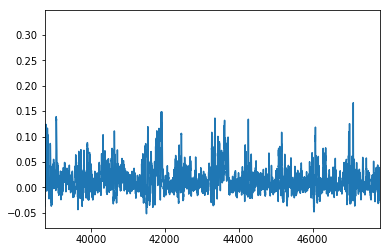

In [19]:
plt.plot(dff.mean(axis=0))
plt.xlim(38756,47807)

In [20]:
import scipy.stats as st

In [22]:
st.linregress(dff.mean(axis=0)[np.isfinite(dxcm)], dxcm[np.isfinite(dxcm)])

LinregressResult(slope=4.4614365495562209, intercept=0.0040501809582929524, rvalue=0.09320756531498843, pvalue=4.6570350864362193e-221, stderr=0.14026421781386797)

In [24]:
st.linregress(dff_trace[np.isfinite(dxcm)], dxcm[np.isfinite(dxcm)])

LinregressResult(slope=-0.0096476430520787988, intercept=0.054006118731897278, rvalue=-0.0058006448379716189, pvalue=0.048737225947971911, stderr=0.0048950341265734196)